# HR attrition classification based on IBM data

**Data source:** https://www.kaggle.com/singhnproud77/hr-attrition-dataset

### <span style='color:Green'> The aim of this project is to predict whether an employee will be lost to attrition or not. </span> 

### What is attrition?
Attrition is the gradual reduction in staff members that occurs as employees depart from an oragisation for any reason (eg resignation, termination, death or injury). Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition.


## Overview

This data set presents an employee survey from IBM, indicating if there is attrition or not. The data set contains 1470 entries.


Input variables:
- **Age:** The age of the employee
- **BusinessTravel:** Whether the employee used to travel for business or not
- **Department:** Which department the employee was employeed under
- **DistanceFromHome:** The distance employees travel to reach for a job on a day to day basis
- **Gender:** Gender of the emploee
- **JobInvolvement:** The involvement rating of an employee over the job handled 
- **JobLevel:** Level at which the employee is working 
- **JobRole:** The roles and responsibilities of the employee
- **Job satisfaction:** Satisfaction rating of the employee for the job
- **MaritialStatus:** Maritial status of the employee
- **MonthlyIncome:** Monthly income of the employee
- **NumCompaniesWorked:** Number of companies the employees has worked for
- **OverTime:** Whether employee is working overtime or not
- **PercentSalaryHike:** Percentage salary hike since their appointment in the company
- **PerformaceRating:** Performane rating of an employee
- **StockOptionLevel:** Stock option level
- **TotalWorkingYears:** Total years worked by the employee
- **TrainingtimeLastYear:** How many trainings the employee has undergone
- **YearsAtCompany:** Years spent at the present organisation
- **YearsSinceLastPromotion:** Time gone in years since last promotion
- **YearsWithCurrManager:** Years working under he current manager
- **Higher_Education:** Higher education level of the employee
- **Date_of_Hire:** Date of hire of the employee in the current organisation
- **Date_of_termination:** Date of termination from the organisation
- **Status_of_leaving:** Reason for leaving the organisation
- **Mode_of_work:** Work from Home or Work from office
- **Leaves:** Total permitted leaves taken by the employee
- **Absenteeism:** Total days absent for the employee
- **Work_accident:** Work accident if any
- **Source_of_Hire:** Source of Hire
- **Job_mode:** Working Fulltime/ Part time/ Contractual
- **Unnamed: 32:** Unknown

Output variable:
- **Attrition:** Whether the employee has attrited or not


### **This project consists of three objectives:**

1. Perform exploratory analysis to extract meaningful insight from the data.


2. Identify the best features to be used for modeling.


3. Train, test, and refine various classification models to best predict which employees attrited. The predictive models to be trained are:
    - Logistic Regression
    - Linear Support Vector Classifier (SVC)
    - Kernel Support Vector Classifier (Kernel SVC)
    - K-Nearest Neighbors (KNN)
    - Decision Tree
    - Random Forest
    - XGBoost Classifier


4. Apply the best performing model to the test set 

# 1. Exploratory Data Analysis and Pre-processing

The first step in the machine learnig pipline is to clean and transform the training data into a useable format for modeling. 
As such, exploratory data analysis will address the following:
 - Missing Values
 - Duplicated data
 - Incorrect data types
 - Outilers
 - Relationships between independent and dependent variables

### Import libraries 

In [106]:
#import all important libraries

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import plotly.graph_objs as go #visualization
%matplotlib inline
import seaborn as sns
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.linear_model import Lasso # feature slection
from sklearn.feature_selection import SelectFromModel # feature slection

from sklearn.ensemble import ExtraTreesRegressor #feature improtance
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.preprocessing import MinMaxScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import RandomForestRegressor #Random Forests
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.model_selection import GridSearchCV #parameter tuning

from sklearn.model_selection import RandomizedSearchCV #Hyperperameter tuning
from sklearn import metrics # evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score # evaluation metrics

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

### Load data
Lets load the dataset and examine the shape to get a better sense of the data and the information it contains.

In [2]:
#load data
dataset = pd.read_csv('ibm_hr_attrition.csv')
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,0,7,3,0,0,0,Graduation,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,0,6,0,0,0,Graduation,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,0,17,3,0,0,0,Post-Graduation,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,1,3,3,0,0,0,PHD,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,0,1,5,0,0,0,PHD,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


In [3]:
# data shape
dataset.shape

(1470, 33)

In [4]:
# data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

<AxesSubplot:xlabel='Attrition', ylabel='count'>

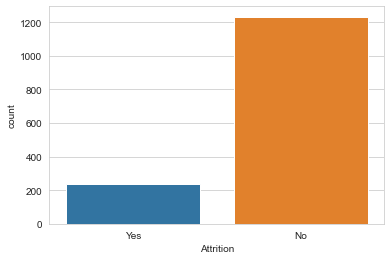

In [5]:
# countplot of target variable
sns.set_style('whitegrid')
sns.countplot(x='Attrition',data=dataset)

### <span style='color:Purple'> *Insights:*  </span> 
- Dataset contains 1470 examples and 33 features
- Dataest contains categorial features and numerical features
- There appears to be missing values in the *Date_of_termination* and *Unnamed:32* columns
- Our dataset is unblanced i.e majority of the employees were not lost due to attrition

### Missing values
As discovered above, there appears to be a lot of missing data. A heatmap will help better visualise the missing information.

In [6]:
## 1. Make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

## 2. Print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Date_of_termination 1.0  % missing values
Unnamed: 32 1.0  % missing values


<AxesSubplot:>

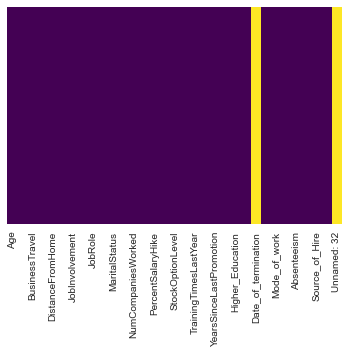

In [7]:
# Heatmap 
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### <span style='color:Purple'> *Insights:*  </span> 
-  *Date_of_termination* and *Unnamed:32* columns contain no data therefore they don't provide any information about an employees liklihood of attrition. Both features can to be removed during feature engineering


### Duplicate values

In [8]:
# number of duplicated entries
dataset.duplicated().sum()

0

### <span style='color:Purple'> *Insights:*  </span> 
- Data does not contain any duplicated values

### Numerical Features
There are two types of numerical features, namely; discrete features and continuos features. Next we will identify and explore both seperatley

### Discrete


In [9]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  19


,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
0,37,2,2,1,3,2090,6,15,3,0,7,3,0,0,0,NaN,4,2,NaN
1,21,15,3,1,4,1232,1,14,3,0,0,6,0,0,0,NaN,5,2,NaN
2,45,6,3,3,1,13245,4,14,3,0,17,3,0,0,0,NaN,1,3,NaN
3,23,2,3,1,1,2322,3,13,3,1,3,3,0,0,0,NaN,1,0,NaN
4,22,15,3,1,4,2871,1,15,3,0,1,5,0,0,0,NaN,5,2,NaN


In [10]:
#number of discrete featues 
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in ['Date_of_termination']+['Unnamed: 32']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 12


In [11]:
discrete_feature

['JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Leaves',
 'Absenteeism']

In [12]:
dataset[discrete_feature].head()

,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism
0,2,1,3,6,15,3,0,3,0,0,4,2
1,3,1,4,1,14,3,0,6,0,0,5,2
2,3,3,1,4,14,3,0,3,0,0,1,3
3,3,1,1,3,13,3,1,3,0,0,1,0
4,3,1,4,1,15,3,0,5,0,0,5,2


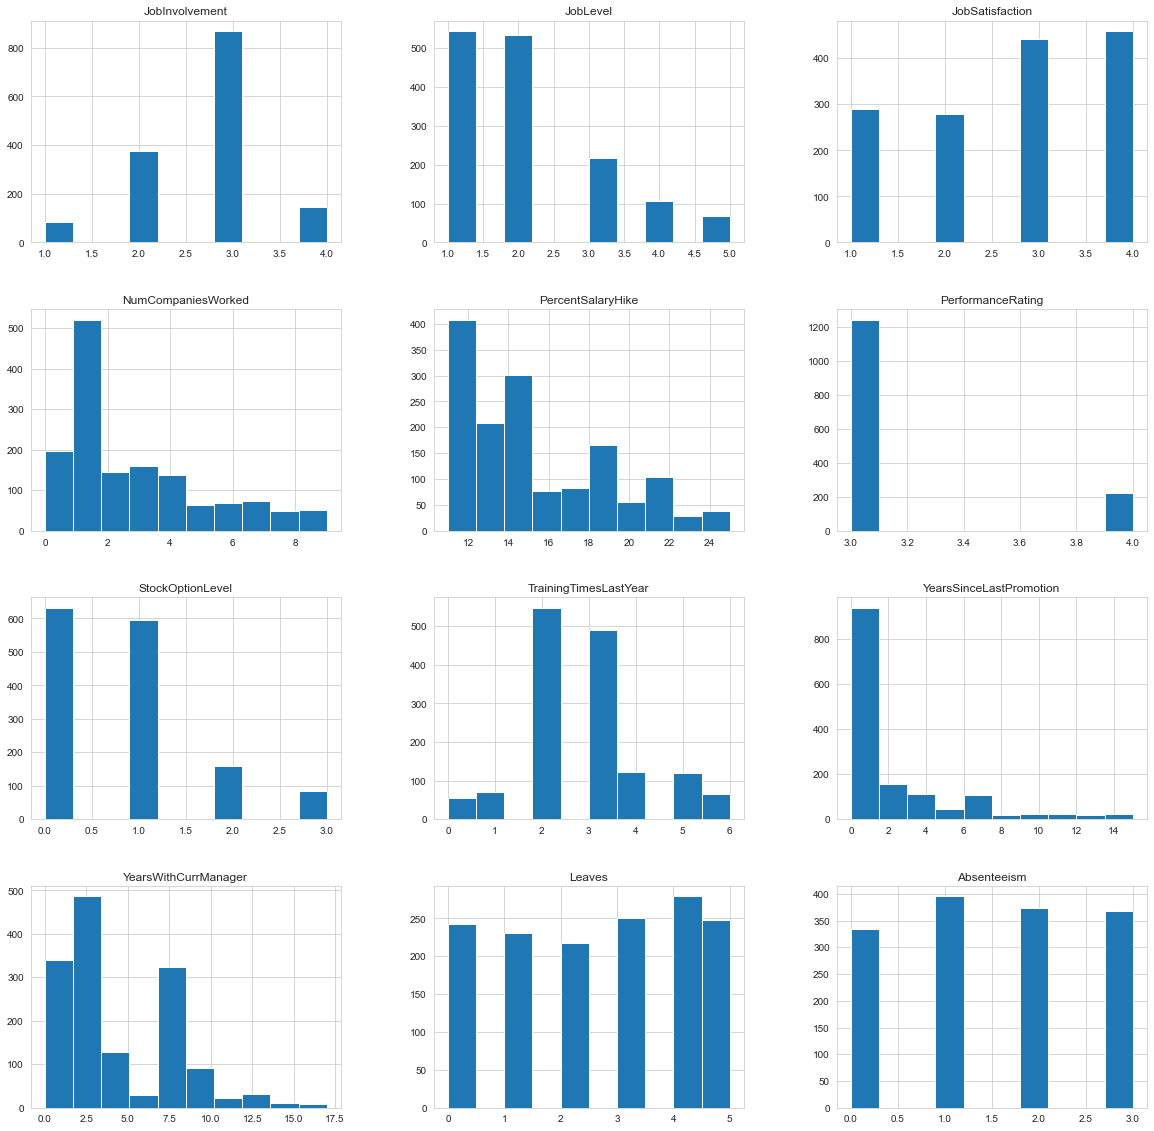

In [13]:
dataset[discrete_feature].hist(figsize=(20,20))
plt.show()

### <span style='color:Purple'> *Insights:*  </span> 
- Majority of employees have a job involvement rating of 3 


- Most of the employess have a job level of 1 or 2 


- Most of the employees have job satisfaction levels of 3 or 4


- Majority of employees have only worked at one other company


- Majority of employees salary has increased by a percentage of 15 or less since their appointment in the company


- Most of the employess have an employment rating of 3 


- Majority of employees have been promoted in the last year

### Continuous

In [14]:
#number of continuous variables
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Date_of_termination']+['Unnamed: 32']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


In [15]:
dataset[continuous_feature].head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,37,2,2090,7,0
1,21,15,1232,0,0
2,45,6,13245,17,0
3,23,2,2322,3,0
4,22,15,2871,1,0


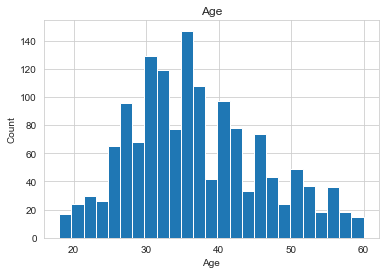

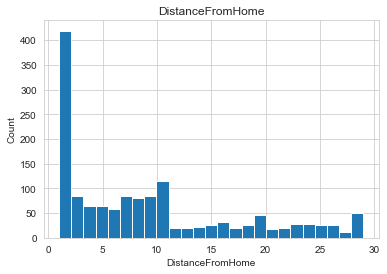

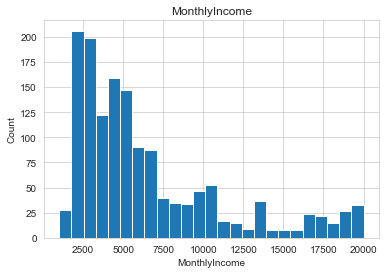

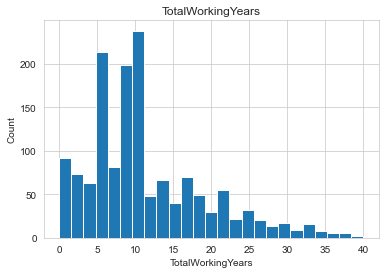

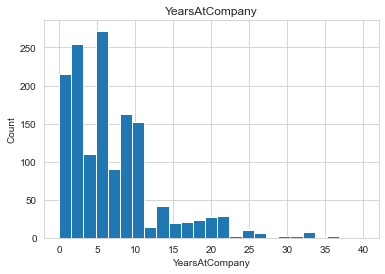

In [16]:
for feature in continuous_feature:
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

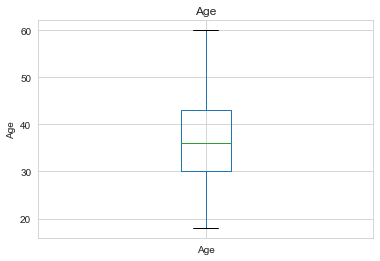

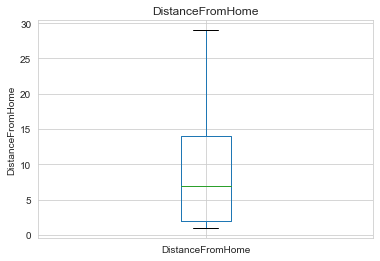

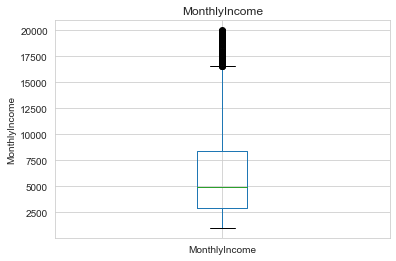

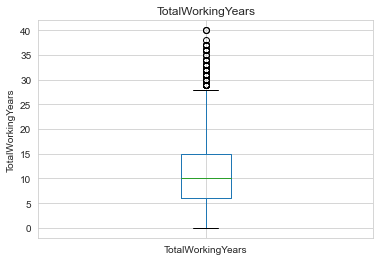

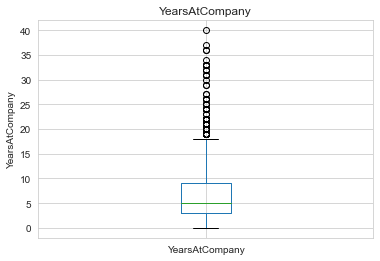

In [17]:
for feature in continuous_feature:
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### <span style='color:Purple'> *Insights:*  </span> 
- Majority of employees lie between the age range of 39 to 40


- Majority of employees live within 10kms of their workplace


- Majority of employees have a monthly income betweeen 2500 and   8000


- Most of the employees have worked a total of 15 years or less in their whole career


- Majority of employees have worked at the organisation for 10 years or less

### Target vs Numeric Features



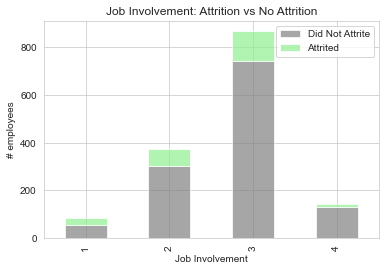

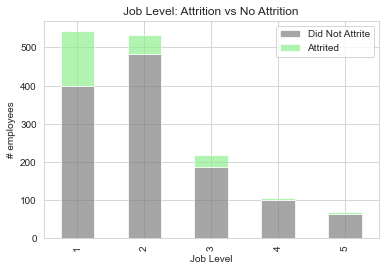

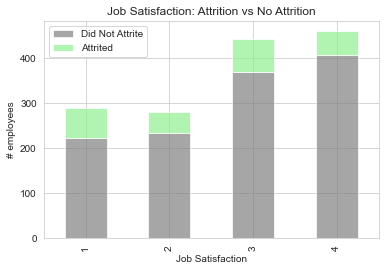

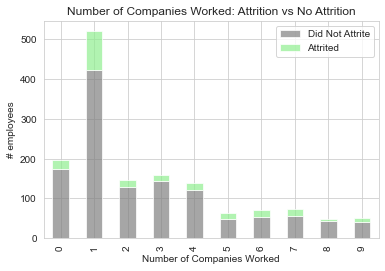

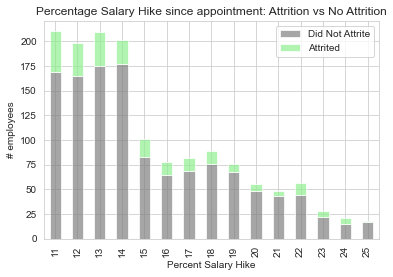

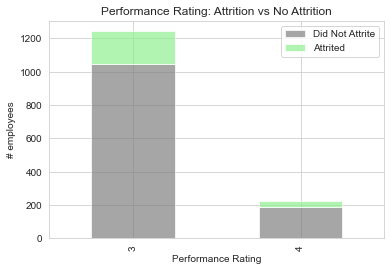

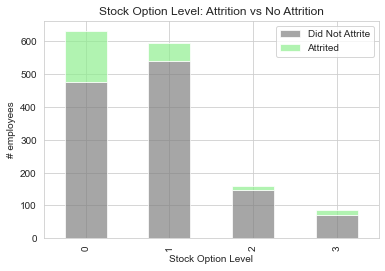

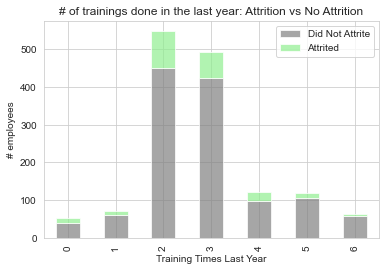

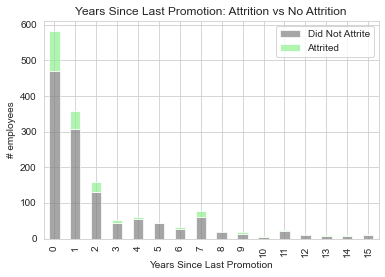

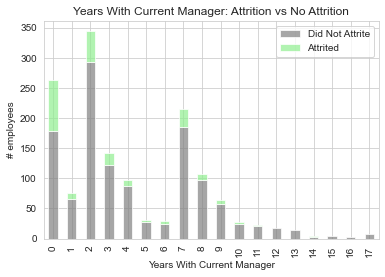

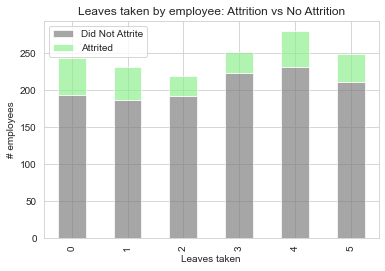

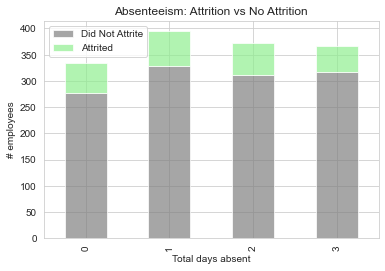

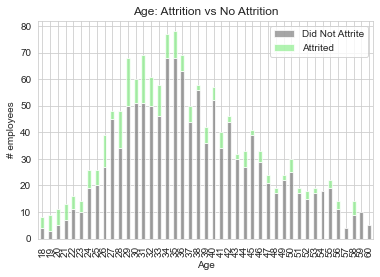

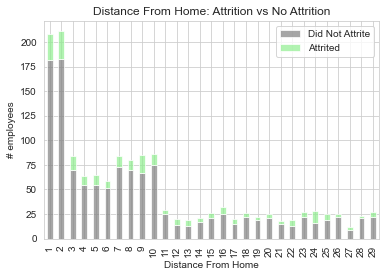

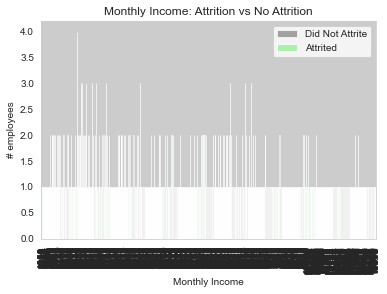

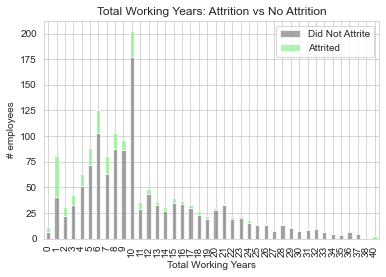

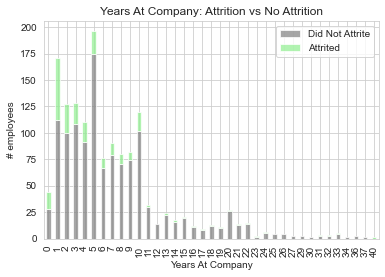

In [18]:
# job Involvement
jobinvolvement = dataset.groupby(['JobInvolvement','Attrition']).JobInvolvement.count().unstack()
ji1 = jobinvolvement.plot(kind = 'bar', stacked = True, 
                   title = 'Job Involvement: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
ji1.set_xlabel('Job Involvement')
ji1.set_ylabel('# employees')
ji1.legend(['Did Not Attrite','Attrited'])

# job Level
joblevel = dataset.groupby(['JobLevel','Attrition']).JobLevel.count().unstack()
jl1 = joblevel.plot(kind = 'bar', stacked = True, 
                   title = 'Job Level: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
jl1.set_xlabel('Job Level')
jl1.set_ylabel('# employees')
jl1.legend(['Did Not Attrite','Attrited'])


# job Satisfaction
jobsatisfaction = dataset.groupby(['JobSatisfaction','Attrition']).JobSatisfaction.count().unstack()
js1 = jobsatisfaction.plot(kind = 'bar', stacked = True, 
                   title = 'Job Satisfaction: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
js1.set_xlabel('Job Satisfaction')
js1.set_ylabel('# employees')
js1.legend(['Did Not Attrite','Attrited'])


# Number of companies worked
numcompanies = dataset.groupby(['NumCompaniesWorked','Attrition']).NumCompaniesWorked.count().unstack()
nc1 = numcompanies.plot(kind = 'bar', stacked = True, 
                   title = 'Number of Companies Worked: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
nc1.set_xlabel('Number of Companies Worked')
nc1.set_ylabel('# employees')
nc1.legend(['Did Not Attrite','Attrited'])


# Percent Salary Hike
percentsalary = dataset.groupby(['PercentSalaryHike','Attrition']).PercentSalaryHike.count().unstack()
ps1 = percentsalary.plot(kind = 'bar', stacked = True, 
                   title = 'Percentage Salary Hike since appointment: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
ps1.set_xlabel('Percent Salary Hike')
ps1.set_ylabel('# employees')
ps1.legend(['Did Not Attrite','Attrited'])

# Performance rating
performancerating = dataset.groupby(['PerformanceRating','Attrition']).PerformanceRating.count().unstack()
pr1 = performancerating.plot(kind = 'bar', stacked = True, 
                   title = 'Performance Rating: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
pr1.set_xlabel('Performance Rating')
pr1.set_ylabel('# employees')
pr1.legend(['Did Not Attrite','Attrited'])

# Stock Option Level
stockoptionlevel = dataset.groupby(['StockOptionLevel','Attrition']).StockOptionLevel.count().unstack()
so1 = stockoptionlevel.plot(kind = 'bar', stacked = True, 
                   title = 'Stock Option Level: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
so1.set_xlabel('Stock Option Level')
so1.set_ylabel('# employees')
so1.legend(['Did Not Attrite','Attrited'])

# Training times
trainingtimes = dataset.groupby(['TrainingTimesLastYear','Attrition']).TrainingTimesLastYear.count().unstack()
tt1 = trainingtimes.plot(kind = 'bar', stacked = True, 
                   title = '# of trainings done in the last year: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
tt1.set_xlabel('Training Times Last Year')
tt1.set_ylabel('# employees')
tt1.legend(['Did Not Attrite','Attrited'])

# Years since last promotion
yearssincelastpromotion = dataset.groupby(['YearsSinceLastPromotion','Attrition']).YearsSinceLastPromotion.count().unstack()
ys1 = yearssincelastpromotion.plot(kind = 'bar', stacked = True, 
                   title = 'Years Since Last Promotion: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
ys1.set_xlabel('Years Since Last Promotion')
ys1.set_ylabel('# employees')
ys1.legend(['Did Not Attrite','Attrited'])

# Years with current manager
yearswithcurr = dataset.groupby(['YearsWithCurrManager','Attrition']).YearsWithCurrManager.count().unstack()
yw1 = yearswithcurr.plot(kind = 'bar', stacked = True, 
                   title = 'Years With Current Manager: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
yw1.set_xlabel('Years With Current Manager')
yw1.set_ylabel('# employees')
yw1.legend(['Did Not Attrite','Attrited'])

# Leaves
leaves = dataset.groupby(['Leaves','Attrition']).Leaves.count().unstack()
l1 = leaves.plot(kind = 'bar', stacked = True, 
                   title = 'Leaves taken by employee: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
l1.set_xlabel('Leaves taken')
l1.set_ylabel('# employees')
l1.legend(['Did Not Attrite','Attrited'])

# Absenteeism
absenteeism = dataset.groupby(['Absenteeism','Attrition']).Absenteeism.count().unstack()
a1 = absenteeism.plot(kind = 'bar', stacked = True, 
                   title = 'Absenteeism: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
a1.set_xlabel('Total days absent')
a1.set_ylabel('# employees')
a1.legend(['Did Not Attrite','Attrited'])

# Age
age = dataset.groupby(['Age','Attrition']).Age.count().unstack()
ag1 = age.plot(kind = 'bar', stacked = True, 
                   title = 'Age: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
ag1.set_xlabel('Age')
ag1.set_ylabel('# employees')
ag1.legend(['Did Not Attrite','Attrited'])

# Distance from home
distancefromhome = dataset.groupby(['DistanceFromHome','Attrition']).DistanceFromHome.count().unstack()
df1 = distancefromhome.plot(kind = 'bar', stacked = True, 
                   title = 'Distance From Home: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
df1.set_xlabel('Distance From Home')
df1.set_ylabel('# employees')
df1.legend(['Did Not Attrite','Attrited'])

# Monthly Income
monthlyincome = dataset.groupby(['MonthlyIncome','Attrition']).MonthlyIncome.count().unstack()
mi1 = monthlyincome.plot(kind = 'bar', stacked = True, 
                   title = 'Monthly Income: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
mi1.set_xlabel('Monthly Income')
mi1.set_ylabel('# employees')
mi1.legend(['Did Not Attrite','Attrited'])

# Total working years
totalworkingyears = dataset.groupby(['TotalWorkingYears','Attrition']).TotalWorkingYears.count().unstack()
tw1 = totalworkingyears.plot(kind = 'bar', stacked = True, 
                   title = 'Total Working Years: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
tw1.set_xlabel('Total Working Years')
tw1.set_ylabel('# employees')
tw1.legend(['Did Not Attrite','Attrited'])

# Years at company
yearsatcompany = dataset.groupby(['YearsAtCompany','Attrition']).YearsAtCompany.count().unstack()
ya1 = yearsatcompany.plot(kind = 'bar', stacked = True, 
                   title = 'Years At Company: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
ya1.set_xlabel('Years At Company')
ya1.set_ylabel('# employees')
ya1.legend(['Did Not Attrite','Attrited'])
plt.show()

- *Job Satisfaction*, *Leaves taken*, *Total days absent* features dont seem to have a big impact on the determination of *Attrition* of employees


- Employees with a job involvement level of 3 , job level of 1 amd 2 , Performance rating of 3 are more likely to leave due to attrition


- Number of companies worked : Employees who have worked for only one other company are more likely to leave due to attrition 


- Percent Salary hike: employees with a percentage salary hike of less than 15% since joining the company are more likely to attrite


- Stock option level: employees with a stock option level of 0 are more likely to leave due to attrition


- Employees who have trained 2 or 3 times are likely to leave due to attrition


- Employees who have recently been promoted (within the last 2 years) are more likely to leave due to attrition


- Employees who have worked with their current manager for less than a year and two years are more likely to leave due to attrition 


- Majority of attritions lie between the ages of 28 and 37 


- Attrition rate tends to be higher when the distance from home  exceeds 10km


- Employees who have worked at the company for 10years or less are more likely to leave due to attrition


- Employees who have worked for a total of 10 years or less in thier careers are more likely to leave due to attrition

### Categorical Variables

We will plot the categorical features to see how the classes are distributed for each feature.

In [19]:
#categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Higher_Education',
 'Date_of_Hire',
 'Status_of_leaving',
 'Mode_of_work',
 'Work_accident',
 'Source_of_Hire',
 'Job_mode']

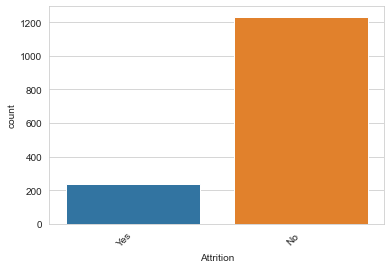

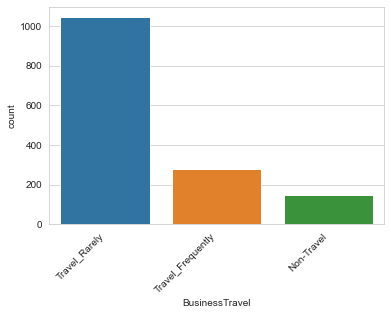

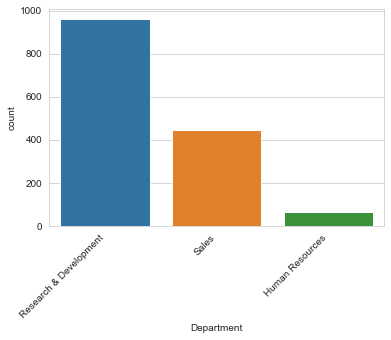

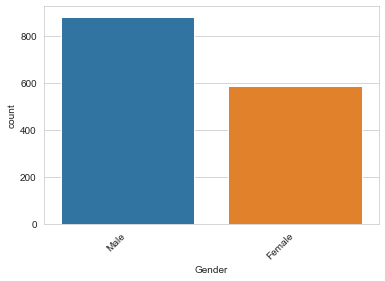

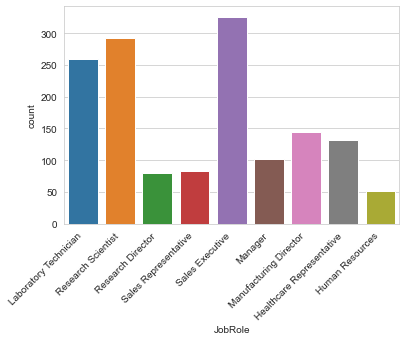

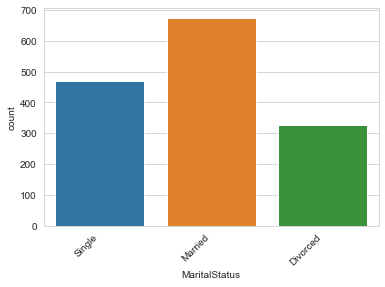

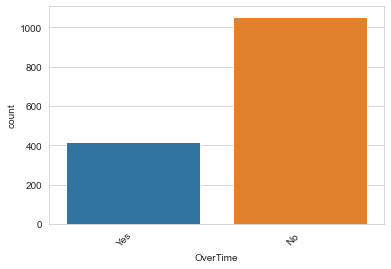

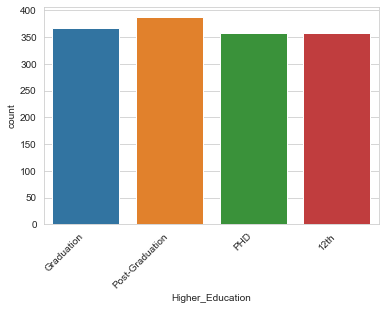

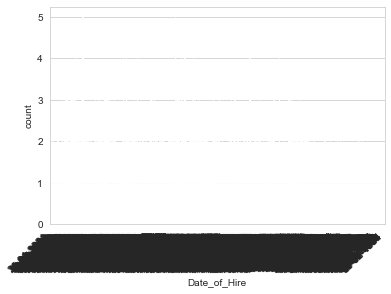

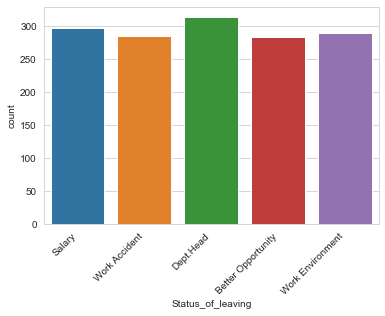

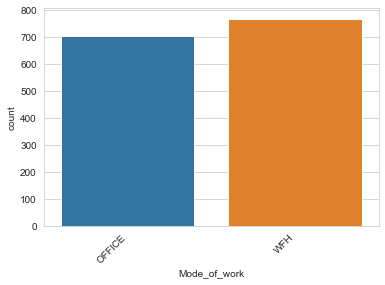

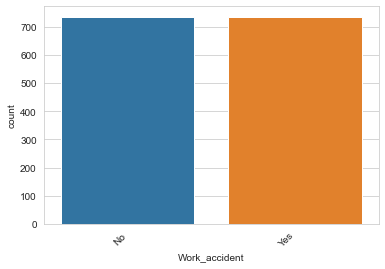

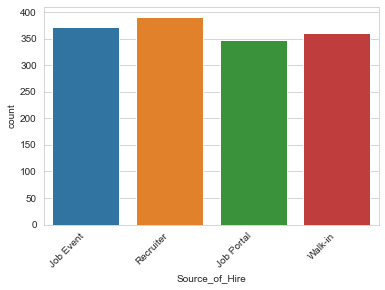

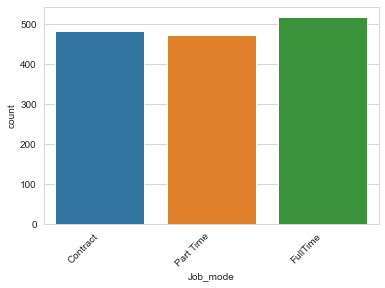

In [20]:
for col in dataset.select_dtypes(include='object'):
    chart= sns.countplot(x=col, data = dataset[categorical_features])
    
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    
    plt.show()

### <span style='color:Purple'> *Insights:*  </span> 
- *Date_of_Hire* feature has too many categories so it may need to represented as a numerical feature.


- About 70% of employees rarely travel for business purposes 


- Around 60% of employees are working in the Research and Development department

- Majority of emloyees are male


- Most employess work as Labatory Techicians Reasearch, Scientists and Sales Technicians


- Majority of employees are not working overtime and majority of employees are working from home


- The count of married employees is more.


- Most of the employees in the organisation were sourced by a recruiter


- Most of the employees work full-time

### Target vs Categorical Features


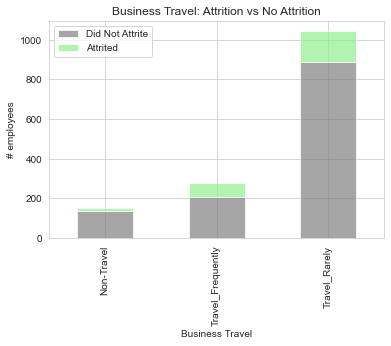

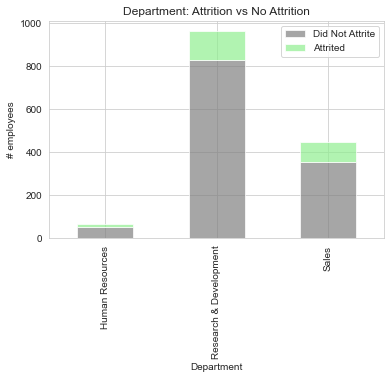

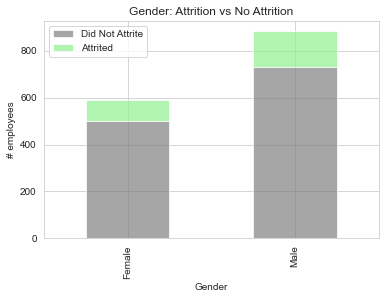

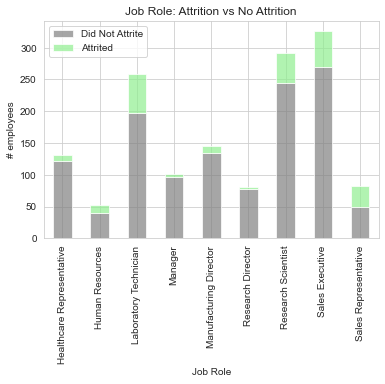

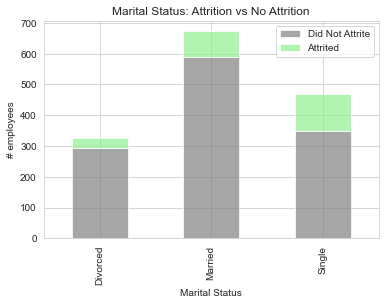

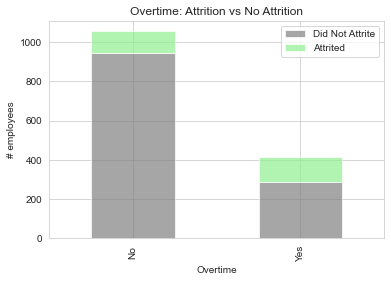

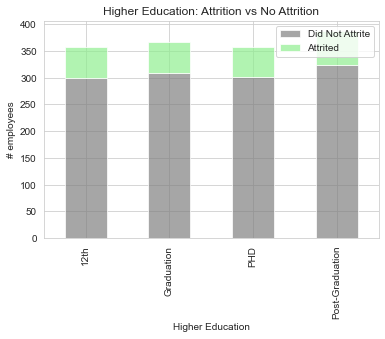

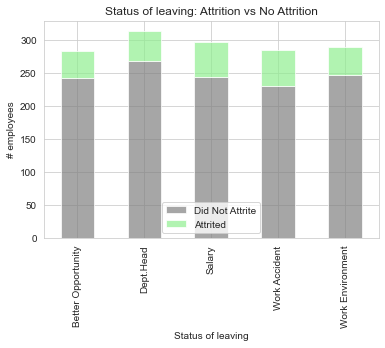

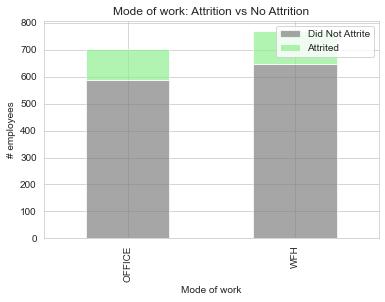

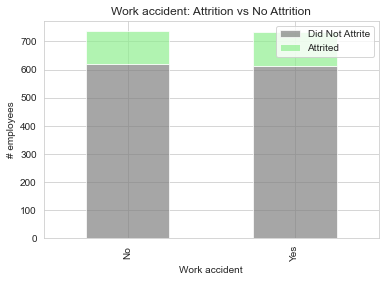

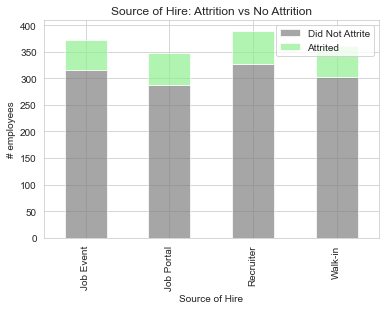

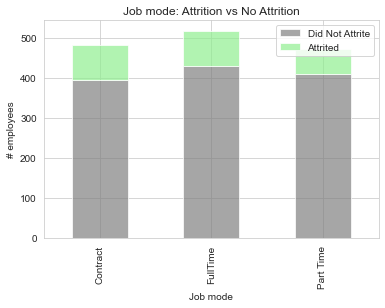

In [21]:
# Suplots of categorical features v attrition

# figsize = (20,7)
# ax = axes[0]
#sns.set_style('darkgrid')
#f, axes = plt.subplots(12,1)

# Business Travel
businesstravel= dataset.groupby(['BusinessTravel','Attrition']).BusinessTravel.count().unstack()
p1 = businesstravel.plot(kind = 'bar', stacked = True, 
                   title = 'Business Travel: Attrition vs No Attrition', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Business Travel')
p1.set_ylabel('# employees')
p1.legend(['Did Not Attrite','Attrited'])

# Department
department = dataset.groupby(['Department','Attrition']).Department.count().unstack()
p2 = department.plot(kind = 'bar', stacked = True, 
                    title = 'Department: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p2.set_xlabel('Department')
p2.set_ylabel('# employees')
p2.legend(['Did Not Attrite','Attrited'])

#Gender
gender = dataset.groupby(['Gender','Attrition']).Gender.count().unstack()
p3 = gender.plot(kind = 'bar', stacked = True, 
                    title = 'Gender: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p3.set_xlabel('Gender')
p3.set_ylabel('# employees')
p3.legend(['Did Not Attrite','Attrited'])

#Job Role
jobrole = dataset.groupby(['JobRole','Attrition']).JobRole.count().unstack()
p4 = jobrole.plot(kind = 'bar', stacked = True, 
                    title = 'Job Role: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p4.set_xlabel('Job Role')
p4.set_ylabel('# employees')
p4.legend(['Did Not Attrite','Attrited'])

# Marital Status
maritalstatus = dataset.groupby(['MaritalStatus','Attrition']).MaritalStatus.count().unstack()
p5 = maritalstatus.plot(kind = 'bar', stacked = True, 
                    title = 'Marital Status: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p5.set_xlabel('Marital Status')
p5.set_ylabel('# employees')
p5.legend(['Did Not Attrite','Attrited'])

# Overtime
overtime = dataset.groupby(['OverTime','Attrition']).OverTime.count().unstack()
p6 = overtime.plot(kind = 'bar', stacked = True, 
                    title = 'Overtime: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p6.set_xlabel('Overtime')
p6.set_ylabel('# employees')
p6.legend(['Did Not Attrite','Attrited'])

# Higher Education
highereducation = dataset.groupby(['Higher_Education','Attrition']).Higher_Education.count().unstack()
p7 = highereducation.plot(kind = 'bar', stacked = True, 
                    title = 'Higher Education: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p7.set_xlabel('Higher Education')
p7.set_ylabel('# employees')
p7.legend(['Did Not Attrite','Attrited'])

# Status of leaving 
statusofleaving = dataset.groupby(['Status_of_leaving','Attrition']).Status_of_leaving.count().unstack()
p8 = statusofleaving.plot(kind = 'bar', stacked = True, 
                    title = 'Status of leaving: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p8.set_xlabel('Status of leaving')
p8.set_ylabel('# employees')
p8.legend(['Did Not Attrite','Attrited'])

# Mode of work
modeofwork = dataset.groupby(['Mode_of_work','Attrition']).Mode_of_work.count().unstack()
p9 = modeofwork.plot(kind = 'bar', stacked = True, 
                    title = 'Mode of work: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p9.set_xlabel('Mode of work')
p9.set_ylabel('# employees')
p9.legend(['Did Not Attrite','Attrited'])

# Work accident
workaccident = dataset.groupby(['Work_accident','Attrition']).Work_accident.count().unstack()
p10 = workaccident.plot(kind = 'bar', stacked = True, 
                    title = 'Work accident: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p10.set_xlabel('Work accident')
p10.set_ylabel('# employees')
p10.legend(['Did Not Attrite','Attrited'])

# Source of Hire
sourceofhire = dataset.groupby(['Source_of_Hire','Attrition']).Source_of_Hire.count().unstack()
p11 = sourceofhire.plot(kind = 'bar', stacked = True, 
                    title = 'Source of Hire: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p11.set_xlabel('Source of Hire')
p11.set_ylabel('# employees')
p11.legend(['Did Not Attrite','Attrited'])

# Job mode
jobmode = dataset.groupby(['Job_mode','Attrition']).Job_mode.count().unstack()
p12 = jobmode.plot(kind = 'bar', stacked = True, 
                    title = 'Job mode: Attrition vs No Attrition', 
                    color = ['grey','lightgreen'], alpha = .70)
p12.set_xlabel('Job mode')
p12.set_ylabel('# employees')
p12.legend(['Did Not Attrite','Attrited'])

plt.show()

### <span style='color:Purple'> *Insights:*  </span> 

- Workers who rarely travel for business purposes are more likely to leave 


- Employees in the Research & Development and Sales department are more likely to leave due to attrition


- Employees with a job role as Laboratory Technician, Research Scientist and Sales Executive are more likely to attrite


- Male employees are more likely to attrite


- Employees who have a maritial status of Single are likely to leave due to attrition 


- Employees who work overtime are more likely to leave 


- The higher education level of the employees doesn't seem to have an impact in the determination of attrition


- Employees who have had a work accident are more likely to leave the organisation


- Employees who work from home are more likely to leave due to attrition


- Employees who were sourced by a recruiter are more likely to leave


- Employess who work full-time and contract are more likely to leave due to attrition


### Cardinality of categorical variables

Now we want to focus on the number of different categories in each categoriacal feature

In [22]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))


The feature is Attrition and number of categories are 2
The feature is BusinessTravel and number of categories are 3
The feature is Department and number of categories are 3
The feature is Gender and number of categories are 2
The feature is JobRole and number of categories are 9
The feature is MaritalStatus and number of categories are 3
The feature is OverTime and number of categories are 2
The feature is Higher_Education and number of categories are 4
The feature is Date_of_Hire and number of categories are 1112
The feature is Status_of_leaving and number of categories are 5
The feature is Mode_of_work and number of categories are 2
The feature is Work_accident and number of categories are 2
The feature is Source_of_Hire and number of categories are 4
The feature is Job_mode and number of categories are 3


We can see there are some features with more than 9 unique catergories so we will need to find a way of handling that. The other features we can use one-hot encoding

### Correlation matrix

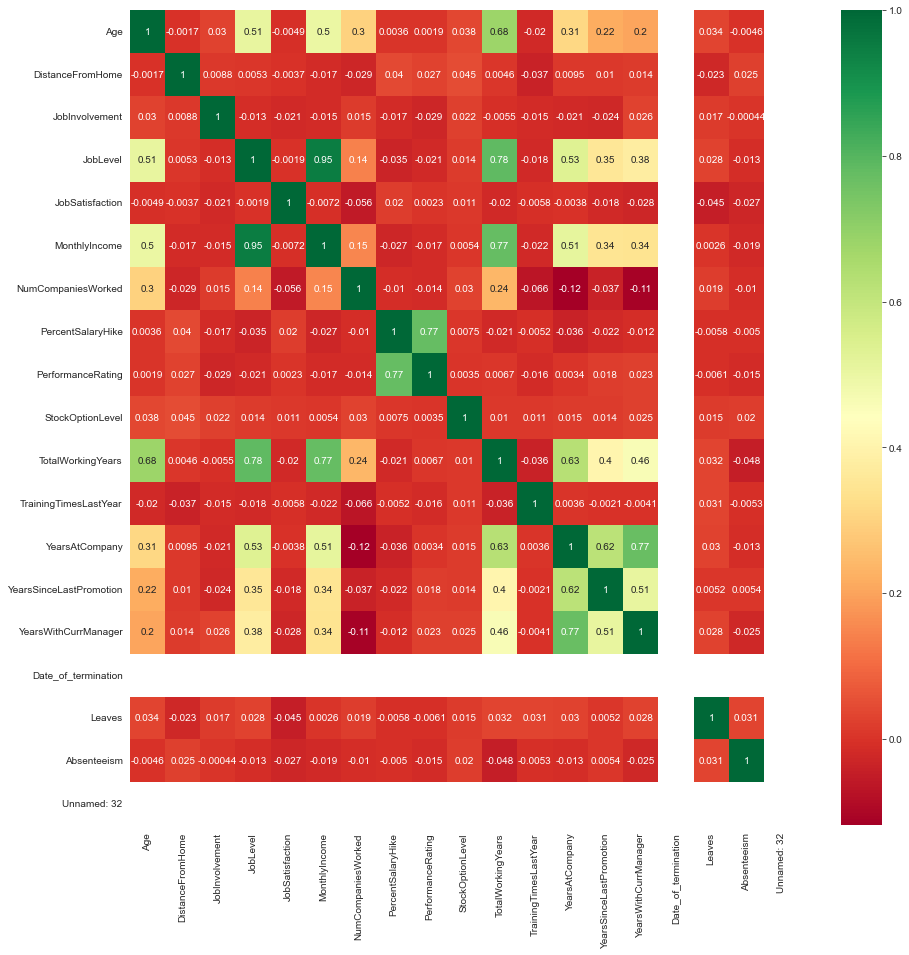

In [23]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

g=sns.heatmap(dataset[top_corr_features].corr(),annot=True, cmap='RdYlGn')
plt.show()

(19.5, -0.5)

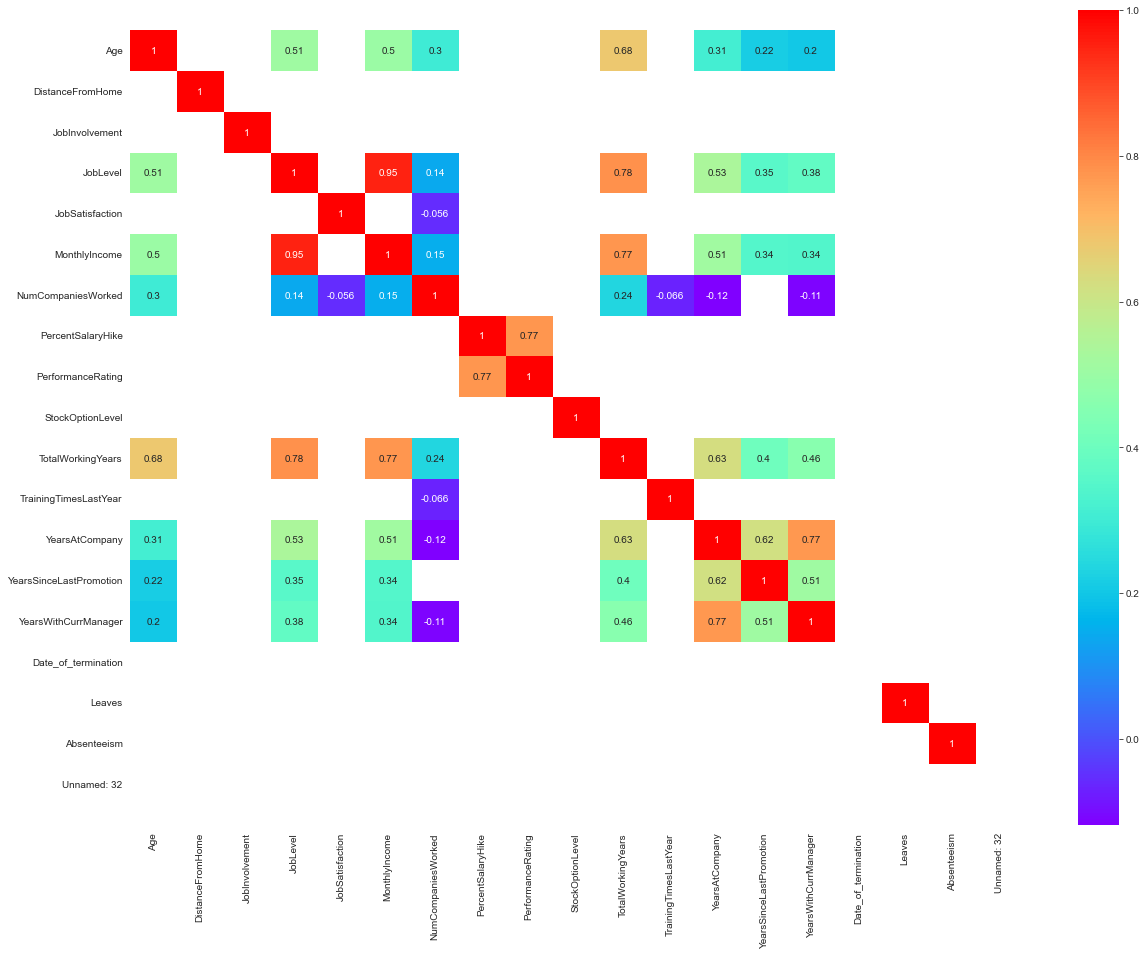

In [24]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(dataset.corr(),cmap='rainbow',mask=abs(dataset.corr())<0.05,annot=True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

### <span style='color:Purple'> *Insights:*  </span> 

- Monthly income is highly correlated with Job Level and Total working years therefore we will drop the Monthly income feature when we perform feature engineering 


- Job level is highly correlated to Total working years 


- Age is positively correlated to Total working years therefore we will also drop the Total working years feature 


# 2. Feature engineering 

Now that we have explored the data, it is tme to get these features 'model ready'. We will address the following:
- remove unnecessary features
- Create dummy variables for each categorical feature

Theres a chance of data leakage so we need to split the data first and then apply feature engineering to the training data and the test data.

In [25]:
# make a copy of original dataset
df = dataset.copy()

In [26]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,0,7,3,0,0,0,Graduation,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,0,6,0,0,0,Graduation,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,0,17,3,0,0,0,Post-Graduation,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,1,3,3,0,0,0,PHD,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,0,1,5,0,0,0,PHD,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

In [28]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(df,df['Attrition'],test_size=0.1,random_state=0)

In [29]:
#training and testing data sizes
X_train.shape, X_test.shape

((1323, 33), (147, 33))

### TRAINIING DATASET

#### Deleting *Date_of_termination*,  *Unannamed: 32*, *Date_of_Hire* , *MonthlyIncome* and *TotalWorkingYears* columns

In [30]:
#remove Date_of_termination and Unannamed: 32 , Date_of_Hire And Attrition columns

X_train = X_train.drop(['Date_of_termination','Unnamed: 32', 'Date_of_Hire', 'MonthlyIncome','TotalWorkingYears' ,'Attrition'], axis =1 )




In [31]:
X_train

,Age,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
231,38,Travel_Rarely,Research & Development,9,Female,3,1,Laboratory Technician,4,Single,1,No,12,3,0,3,2,2,1,Post-Graduation,Work Environment,WFH,5,1,Yes,Recruiter,FullTime
693,40,Travel_Rarely,Sales,10,Female,2,2,Sales Executive,2,Divorced,7,No,12,3,1,2,5,1,3,Post-Graduation,Dept.Head,OFFICE,2,3,Yes,Job Portal,Part Time
96,57,Travel_Rarely,Sales,29,Male,2,4,Manager,4,Divorced,3,No,12,3,1,3,1,0,0,Post-Graduation,Work Accident,WFH,2,3,No,Walk-in,Contract
224,22,Travel_Rarely,Research & Development,2,Male,3,1,Laboratory Technician,4,Married,0,No,14,3,1,2,2,2,1,Graduation,Dept.Head,OFFICE,4,0,Yes,Walk-in,FullTime
948,33,Travel_Rarely,Research & Development,14,Female,3,1,Research Scientist,2,Married,1,No,13,3,1,5,8,1,6,PHD,Work Environment,OFFICE,4,1,No,Recruiter,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,28,Non-Travel,Research & Development,16,Male,3,1,Research Scientist,3,Single,1,No,14,3,0,3,5,1,4,Post-Graduation,Salary,WFH,1,3,Yes,Job Event,Contract
835,29,Travel_Frequently,Research & Development,2,Male,3,2,Healthcare Representative,4,Divorced,1,No,19,3,1,0,6,1,3,PHD,Salary,OFFICE,2,3,Yes,Walk-in,FullTime
1216,31,Travel_Frequently,Sales,26,Male,3,2,Sales Executive,4,Married,1,Yes,11,3,0,4,10,0,8,12th,Better Opportunity,OFFICE,1,0,No,Job Event,Contract
559,30,Travel_Frequently,Human Resources,8,Female,2,1,Human Resources,4,Divorced,6,No,11,3,1,0,4,1,2,Graduation,Dept.Head,WFH,4,1,Yes,Walk-in,Contract


#### Create dummy variables : One hot encoding

In [32]:
#Identify categorial features
X_train.select_dtypes(['object']).columns

Index(['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus',
       'OverTime', 'Higher_Education', 'Status_of_leaving', 'Mode_of_work',
       'Work_accident', 'Source_of_Hire', 'Job_mode'],
      dtype='object')

In [33]:
# Convert categorical variables into 'dummy' or indicator variables

business_travel = pd.get_dummies(X_train['BusinessTravel'], drop_first = True) # drop_first prevents multi-collinearity

department = pd.get_dummies(X_train['Department'], drop_first = True)

gender = pd.get_dummies(X_train['Gender'], drop_first = True)

job_role = pd.get_dummies(X_train['JobRole'], drop_first = True)

marital_status = pd.get_dummies(X_train['MaritalStatus'], drop_first = True)

over_time =  pd.get_dummies(X_train['OverTime'], drop_first = True)

higher_education = pd.get_dummies(X_train['Higher_Education'], drop_first = True)

status_of_leaving = pd.get_dummies(X_train['Status_of_leaving'], drop_first = True)

mode_of_work = pd.get_dummies(X_train['Mode_of_work'], drop_first = True)

work_accident = pd.get_dummies(X_train['Work_accident'], drop_first = True)

source_of_hire = pd.get_dummies(X_train['Source_of_Hire'], drop_first = True)

job_mode = pd.get_dummies(X_train['Job_mode'], drop_first = True)


In [34]:
# Add new dummy columns to data frame
X_train = pd.concat([X_train, business_travel, department, gender, job_role, marital_status, over_time, higher_education, status_of_leaving, mode_of_work, work_accident, source_of_hire, job_mode], axis = 1)
X_train.head(2)

,Age,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes,Graduation,PHD,Post-Graduation,Dept.Head,Salary,Work Accident,Work Environment,WFH,Yes,Job Portal,Recruiter,Walk-in,FullTime,Part Time
231,38,Travel_Rarely,Research & Development,9,Female,3,1,Laboratory Technician,4,Single,1,No,12,3,0,3,2,2,1,Post-Graduation,Work Environment,WFH,5,1,Yes,Recruiter,FullTime,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,1,0
693,40,Travel_Rarely,Sales,10,Female,2,2,Sales Executive,2,Divorced,7,No,12,3,1,2,5,1,3,Post-Graduation,Dept.Head,OFFICE,2,3,Yes,Job Portal,Part Time,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1


In [35]:
# drop unecessary columns
X_train.drop(['BusinessTravel', 'Department', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Higher_Education', 'Status_of_leaving',
       'Mode_of_work', 'Work_accident', 'Source_of_Hire', 'Job_mode'], axis = 1, inplace = True)

# Shape of train data
print('X_train shape',X_train.shape)

# Confirm changes
X_train.head()

X_train shape (1323, 45)


,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes,Graduation,PHD,Post-Graduation,Dept.Head,Salary,Work Accident,Work Environment,WFH,Yes,Job Portal,Recruiter,Walk-in,FullTime,Part Time
231,38,9,3,1,4,1,12,3,0,3,2,2,1,5,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,1,0
693,40,10,2,2,2,7,12,3,1,2,5,1,3,2,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1
96,57,29,2,4,4,3,12,3,1,3,1,0,0,2,3,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
224,22,2,3,1,4,0,14,3,1,2,2,2,1,4,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0
948,33,14,3,1,2,1,13,3,1,5,8,1,6,4,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


Now our train data is perfect and ready for machine learning algorithms:
- all the data is numeric
- everything is concatenated together


### TESTING DATA

Now we will do the same feature engineering for the testing dataset

#### Deleting *Date_of_termination*,  *Unannamed: 32* , *Date_of_Hire*  *MonthlyIncome* and *TotalWorkingYears* columns

In [36]:
#remove Date_of_termination and Unannamed: 32 , Date_of_Hire And Attrition columns

X_test = X_test.drop(['Date_of_termination','Unnamed: 32', 'Date_of_Hire','MonthlyIncome','TotalWorkingYears' , 'Attrition'], axis =1 )



In [37]:
# Convert categorical variables into 'dummy' or indicator variables

business_travel_1 = pd.get_dummies(X_test['BusinessTravel'], drop_first = True) # drop_first prevents multi-collinearity

department_1 = pd.get_dummies(X_test['Department'], drop_first = True)

gender_1 = pd.get_dummies(X_test['Gender'], drop_first = True)

job_role_1 = pd.get_dummies(X_test['JobRole'], drop_first = True)

marital_status_1 = pd.get_dummies(X_test['MaritalStatus'], drop_first = True)

over_time_1 =  pd.get_dummies(X_test['OverTime'], drop_first = True)

higher_education_1 = pd.get_dummies(X_test['Higher_Education'], drop_first = True)

status_of_leaving_1 = pd.get_dummies(X_test['Status_of_leaving'], drop_first = True)

mode_of_work_1 = pd.get_dummies(X_test['Mode_of_work'], drop_first = True)

work_accident_1 = pd.get_dummies(X_test['Work_accident'], drop_first = True)

source_of_hire_1 = pd.get_dummies(X_test['Source_of_Hire'], drop_first = True)

job_mode_1 = pd.get_dummies(X_test['Job_mode'], drop_first = True)


In [38]:
# Add new dummy columns to data frame
X_test = pd.concat([X_test, business_travel_1, department_1, gender_1, job_role_1, marital_status_1, over_time_1, higher_education_1, status_of_leaving_1, mode_of_work_1, work_accident_1, source_of_hire_1, job_mode_1], axis = 1)

In [39]:
# drop unecessary columns
X_test.drop(['BusinessTravel', 'Department', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Higher_Education', 'Status_of_leaving',
       'Mode_of_work', 'Work_accident', 'Source_of_Hire', 'Job_mode'], axis = 1, inplace = True)

# Shape of train data
print('X_test shape',X_test.shape)

# Confirm changes
X_test.head()

X_test shape (147, 45)


,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes,Graduation,PHD,Post-Graduation,Dept.Head,Salary,Work Accident,Work Environment,WFH,Yes,Job Portal,Recruiter,Walk-in,FullTime,Part Time
442,29,2,3,1,2,0,13,3,3,3,3,0,2,2,2,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1091,33,4,3,2,2,5,15,3,2,2,9,1,7,4,2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0
981,30,8,3,3,3,5,11,3,1,2,8,7,7,5,2,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1
785,29,1,3,1,3,0,14,3,0,1,6,1,5,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1332,34,6,3,2,3,1,14,3,0,3,16,2,10,5,3,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# 3. Machine Learning

Next I will feed these features into various classification algorithms to determine the best performance

In [40]:
# Feature Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### LOGISTIC REGRESSION

In [41]:
#create instance for model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(X_train_sc, y_train)

LogisticRegression()

In [42]:
# Predict
y_pred_lreg = lreg.predict(X_test_sc)

In [43]:
# Score It

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[116   5]
 [ 16  10]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          No       0.88      0.96      0.92       121
         Yes       0.67      0.38      0.49        26

    accuracy                           0.86       147
   macro avg       0.77      0.67      0.70       147
weighted avg       0.84      0.86      0.84       147

--------------------------------------------------------------------------------
Accuracy 85.71 %


##### **Interpretation**

**Accuracy**
85% of the models predictions are correct.

**Precision**
Precision is measure of how precise the model's predictions are. 
When the model predicts an employee did not attrite, that employee actually *did not* attrite 88% of the time. However, When the model predicts an employee attrited, that employee actually #did# attrite 67% of the time

**Recall (Sensitivity)**
Out of all the employees that actually did not attrite (121) the model could identify 116 of those employees as not attrited, hence recall score is 96%.

Out of all the employees that actually did attrite (26) the model could identify 10 employees as attrited, hence recall score is 38%

**F1 Score**
F1 Score is the best of both worlds as it is a weighted average of precision and recall. F1 Score for employees who attrited is 49%

### LINEAR SUPPORT VECTOR CLASSIFIER

In [44]:
# Fit model
# Instantiate the model
svc = SVC()

# Fit the model on training data
svc.fit(X_train_sc, y_train)

SVC()

In [45]:
# Predict
y_pred_svc = svc.predict(X_test_sc)

In [46]:
# Score It
print('Support Vector Classifier')
print('\n')

# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*40)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*40)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,2)
print('Accuracy', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[120   1]
 [ 21   5]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          No       0.85      0.99      0.92       121
         Yes       0.83      0.19      0.31        26

    accuracy                           0.85       147
   macro avg       0.84      0.59      0.61       147
weighted avg       0.85      0.85      0.81       147

--------------------------------------------------------------------------------
Accuracy 85.03 %


SVC Parameter Tuning with GridSearch

The SVC performed almost as well as the Logistic Regression however we will perform parameter tuning to improve the performance. We want to find the right parameters for *C* and *gamma*

C: controls the cost of missclassification on the training data.
- High C: low bias (because you penalized the cost of misclassification alot) and high variance.
- Low C: high bias (not penalizing the cost of missclassficiation as much) and low variance.

Gamma
Low gamma: means Gaussian with a large variance
High gamma: high bias and low variance



In [47]:
# Create parameter grid
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [48]:
# Instantiate grid object
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 1) #verbose is the text output describing the process

# Fit to training data
grid.fit(X_train_sc,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [49]:
# Call best_params attribute
print(grid.best_params_)
print('\n')
# Call best_estimators attribute
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=100, gamma=0.001)


After inspection of the best parameters we discover ....

In [50]:
# Predict using best parameters
y_pred_grid = grid.predict(X_test_sc)

In [51]:
# Score It
# Confusion Matrix
print('SVC with GridSearchCV')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_grid))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_grid))

# Accuracy
print('--'*40)
svc_grid_accuracy = round(accuracy_score(y_test, y_pred_grid)*100,2)
print('Accuracy',svc_grid_accuracy,'%')

SVC with GridSearchCV


Confusion Matrix
[[121   0]
 [ 18   8]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       121
         Yes       1.00      0.31      0.47        26

    accuracy                           0.88       147
   macro avg       0.94      0.65      0.70       147
weighted avg       0.89      0.88      0.85       147

--------------------------------------------------------------------------------
Accuracy 87.76 %


By adjusting the parameters with GridSearchCV, the model performed much better in precision, recall than the original SVC (an increase of 16% in the F1 score). However, it still did not outperform the Logistic Regression which is 1% higher in F1 score.

### KERNEL SUPPORT VECTOR CLASSIFIER

There are functions, called kernels, that can take a low dimensional feature space and map it to a very high dimensional space so as to transform a non-linearably separable problem into a seperable one.

Thus, by finding the best linear separator between the different classes and applying the 'kernel trick' in a high dimensional space, you get a very powerful system to set data sets apart where the division line might be non-linear.

In [52]:
# Fit

# Instantiate model object
ksvc= SVC(kernel = 'rbf', random_state = 0)

# Fit on training data
ksvc.fit(X_train_sc, y_train)

SVC(random_state=0)

In [53]:
# Predict
y_pred_ksvc = ksvc.predict(X_test_sc)

In [54]:
# Score it
print('Kernel SVC')

# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ksvc))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_ksvc))

# Accuracy
print('--'*40)
ksvc_accuracy = round(accuracy_score(y_test,y_pred_ksvc)*100,1)
print('Accuracy',ksvc_accuracy,'%')

Kernel SVC


Confusion Matrix
[[120   1]
 [ 21   5]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          No       0.85      0.99      0.92       121
         Yes       0.83      0.19      0.31        26

    accuracy                           0.85       147
   macro avg       0.84      0.59      0.61       147
weighted avg       0.85      0.85      0.81       147

--------------------------------------------------------------------------------
Accuracy 85.0 %


The model did performed exactly the same as the original Linear Support vector classifier

### K- NEARESR NEIGHBORS

K-Nearest Neighbors (KNN) is used to classify new data points based on ‘distance’ to known data on a scatter plot with a two step process:

Find K nearest neighbors based on your distance metric
Let them all vote on the classification
KNN is different from the previous classifiers in that it requires variables to be standardized before the model is trained. This is because the KNN classifier predicts the class of a given test observation by identifying the observations nearest to it. Thus, the scale of the variables matters.

Any variables that are on a large scale will have a much larger effect on the distance between the observations (and hence, on the KNN classifier) than variables that are on a small scale. Therefore, everything should be standardized to the same scale when using k-nearest neighbors to classify.

In [55]:
# Use scaled features variables to re-create a features dataframe
df_X_train = pd.DataFrame(X_train_sc, columns = X_train.columns)

df_X_test = pd.DataFrame(X_test_sc, columns = X_test.columns)

In [56]:
df_X_train.head()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes,Graduation,PHD,Post-Graduation,Dept.Head,Salary,Work Accident,Work Environment,WFH,Yes,Job Portal,Recruiter,Walk-in,FullTime,Part Time
0,0.104786,-0.008411,0.374526,-0.950921,1.148733,-0.687264,-0.887670,-0.433142,-0.936257,0.146712,-0.812616,-0.049891,-0.876045,1.412656,-0.482728,-0.48626,0.64771,0.722800,-0.651239,-1.228998,-0.198185,2.162894,-0.274972,-0.321589,-0.239904,-0.507548,-0.525162,-0.246873,-0.920742,1.476580,-0.631284,-0.576477,-0.569495,1.670578,-0.520474,-0.507548,-0.491007,2.017168,0.956356,0.999244,-0.561346,1.683681,-0.568331,1.365151,-0.691529
1,0.322931,0.115233,-1.025185,-0.045184,-0.660522,1.712868,-0.887670,-0.433142,0.243427,-0.629689,-0.318321,-0.362717,-0.308461,-0.340575,1.349838,-0.48626,0.64771,-1.383509,1.535535,-1.228998,-0.198185,-0.462343,-0.274972,-0.321589,-0.239904,-0.507548,1.904173,-0.246873,-0.920742,-0.677241,-0.631284,-0.576477,-0.569495,1.670578,1.921325,-0.507548,-0.491007,-0.495745,-1.045636,0.999244,1.781432,-0.593937,-0.568331,-0.732520,1.446071
2,2.177166,2.464462,-1.025185,1.766290,1.148733,0.112780,-0.887670,-0.433142,0.243427,0.146712,-0.977380,-0.675542,-1.159838,-0.340575,1.349838,-0.48626,0.64771,-1.383509,1.535535,0.813671,-0.198185,-0.462343,3.636730,-0.321589,-0.239904,-0.507548,-0.525162,-0.246873,-0.920742,-0.677241,-0.631284,-0.576477,-0.569495,1.670578,-0.520474,-0.507548,2.036630,-0.495745,0.956356,-1.000756,-0.561346,-0.593937,1.759538,-0.732520,-0.691529
3,-1.640377,-0.873917,0.374526,-0.950921,1.148733,-1.087286,-0.342837,-0.433142,0.243427,-0.629689,-0.812616,-0.049891,-0.876045,0.828245,-1.399011,-0.48626,0.64771,0.722800,-0.651239,0.813671,-0.198185,2.162894,-0.274972,-0.321589,-0.239904,-0.507548,-0.525162,-0.246873,1.086081,-0.677241,-0.631284,1.734673,-0.569495,-0.598595,1.921325,-0.507548,-0.491007,-0.495745,-1.045636,0.999244,-0.561346,-0.593937,1.759538,1.365151,-0.691529
4,-0.440578,0.609807,0.374526,-0.950921,-0.660522,-0.687264,-0.615254,-0.433142,0.243427,1.699516,0.175973,-0.362717,0.542917,0.828245,-0.482728,-0.48626,0.64771,0.722800,-0.651239,-1.228998,-0.198185,-0.462343,-0.274972,-0.321589,-0.239904,1.970259,-0.525162,-0.246873,1.086081,-0.677241,-0.631284,-0.576477,1.755942,-0.598595,-0.520474,-0.507548,-0.491007,2.017168,-1.045636,-1.000756,-0.561346,1.683681,-0.568331,-0.732520,-0.691529


In [57]:
df_X_test.head()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes,Graduation,PHD,Post-Graduation,Dept.Head,Salary,Work Accident,Work Environment,WFH,Yes,Job Portal,Recruiter,Walk-in,FullTime,Part Time
0,-0.876868,-0.873917,0.374526,-0.950921,-0.660522,-1.087286,-0.615254,-0.433142,2.602795,0.146712,-0.647851,-0.675542,-0.592253,-0.340575,0.433555,2.056514,-1.543901,0.722800,-0.651239,-1.228998,-0.198185,2.162894,-0.274972,-0.321589,-0.239904,-0.507548,-0.525162,-0.246873,1.086081,-0.677241,-0.631284,-0.576477,-0.569495,-0.598595,-0.520474,1.970259,-0.491007,-0.495745,-1.045636,-1.000756,-0.561346,1.683681,-0.568331,-0.732520,-0.691529
1,-0.440578,-0.626629,0.374526,-0.045184,-0.660522,0.912824,-0.070421,-0.433142,1.423111,-0.629689,0.340738,-0.362717,0.826709,0.828245,0.433555,-0.486260,-1.543901,0.722800,-0.651239,0.813671,-0.198185,-0.462343,-0.274972,-0.321589,-0.239904,1.970259,-0.525162,-0.246873,-0.920742,-0.677241,-0.631284,-0.576477,1.755942,-0.598595,1.921325,-0.507548,-0.491007,-0.495745,0.956356,0.999244,-0.561346,-0.593937,-0.568331,-0.732520,-0.691529
2,-0.767796,-0.132055,0.374526,0.860553,0.244106,0.912824,-1.160087,-0.433142,0.243427,-0.629689,0.175973,1.514236,0.826709,1.412656,0.433555,-0.486260,0.647710,-1.383509,1.535535,0.813671,-0.198185,-0.462343,-0.274972,-0.321589,-0.239904,-0.507548,1.904173,-0.246873,-0.920742,-0.677241,-0.631284,-0.576477,1.755942,-0.598595,-0.520474,1.970259,-0.491007,-0.495745,0.956356,0.999244,-0.561346,1.683681,-0.568331,-0.732520,1.446071
3,-0.876868,-0.997560,0.374526,-0.950921,0.244106,-1.087286,-0.342837,-0.433142,-0.936257,-1.406091,-0.153556,-0.362717,0.259124,-1.509395,-1.399011,-0.486260,0.647710,0.722800,-0.651239,0.813671,-0.198185,-0.462343,-0.274972,-0.321589,-0.239904,1.970259,-0.525162,-0.246873,-0.920742,1.476580,-0.631284,-0.576477,1.755942,-0.598595,-0.520474,-0.507548,-0.491007,-0.495745,0.956356,-1.000756,-0.561346,1.683681,-0.568331,-0.732520,-0.691529
4,-0.331505,-0.379342,0.374526,-0.045184,0.244106,-0.687264,-0.342837,-0.433142,-0.936257,0.146712,1.494092,-0.049891,1.678086,1.412656,1.349838,-0.486260,0.647710,0.722800,-0.651239,-1.228998,-0.198185,-0.462343,-0.274972,-0.321589,-0.239904,1.970259,-0.525162,-0.246873,-0.920742,1.476580,-0.631284,-0.576477,-0.569495,-0.598595,-0.520474,-0.507548,2.036630,-0.495745,-1.045636,-1.000756,-0.561346,-0.593937,-0.568331,1.365151,-0.691529


In [58]:
# Fit model

# Create instance of model
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit to training data
knn.fit(df_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [59]:
# Predict
y_pred_knn = knn.predict(df_X_test)


In [60]:
# Score it
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')

# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_knn))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_knn))

# Accuracy
print('--'*40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100,1)
print('Accuracy',knn_accuracy,'%')

K-Nearest Neighbors (KNN)
k = 1


Confusion Matrix
[[109  12]
 [ 20   6]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          No       0.84      0.90      0.87       121
         Yes       0.33      0.23      0.27        26

    accuracy                           0.78       147
   macro avg       0.59      0.57      0.57       147
weighted avg       0.75      0.78      0.77       147

--------------------------------------------------------------------------------
Accuracy 78.2 %


**KNN Parameter Tuning**

With a precision of 78.5%, the model's performance is accepatable using k = 1, but could be improved by choosing a better k value.

The best way to identify the optimal k value is with the 'Elbow' method, which interates many models using different k values and plots their error rates. The k with the lowest error rate is the optimal value we want to use.

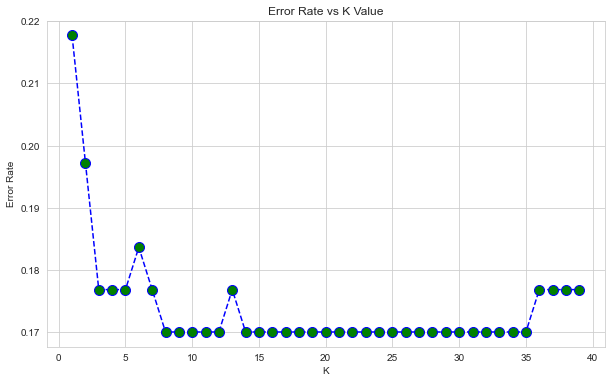

In [61]:
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(df_X_train, y_train)
    pred_i = knn.predict(df_X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

At k=5, the error rate is at it's lowest, making **5** the optimal value for k. I will retrain and test the model accordingly.

In [68]:
# Fit new KNN

# Create model object
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit new KNN on training data
knn.fit(df_X_train, y_train)

KNeighborsClassifier()

In [69]:
# Predict new KNN
y_pred_knn_op = knn.predict(df_X_test)

In [70]:
# Score it with new KNN
print('K-Nearest Neighbors(KNN)')
print('k = 5')

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*40)
print('Classfication Report')
print(classification_report(y_test, y_pred_ksvc))

# Accuracy
print('--'*40)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,2)
print('Accuracy',knn_op_accuracy,'%')

K-Nearest Neighbors(KNN)
k = 5


[[118   3]
 [ 23   3]]
--------------------------------------------------------------------------------
Classfication Report
              precision    recall  f1-score   support

          No       0.85      0.99      0.92       121
         Yes       0.83      0.19      0.31        26

    accuracy                           0.85       147
   macro avg       0.84      0.59      0.61       147
weighted avg       0.85      0.85      0.81       147

--------------------------------------------------------------------------------
Accuracy 82.31 %


By using the elbow method to find the optimal k value, the model's accuracy increased by 4%,  precision improved by 10% and f1-score increased by 4%.

### DECISION TREE

In [71]:
# Fit

# Create model object
dtree = DecisionTreeClassifier()

# Fit to training sets
dtree.fit(df_X_train,y_train)

DecisionTreeClassifier()

In [72]:
# Predict
y_pred_dtree = dtree.predict(df_X_test)

In [73]:
# Score It
print('Decision Tree')

# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')

Decision Tree


Confusion Matrix
[[106  15]
 [ 18   8]]
--------------------------------------------------------------------------------
Classification Report               precision    recall  f1-score   support

          No       0.85      0.88      0.87       121
         Yes       0.35      0.31      0.33        26

    accuracy                           0.78       147
   macro avg       0.60      0.59      0.60       147
weighted avg       0.77      0.78      0.77       147

--------------------------------------------------------------------------------
Accuracy 77.55 %


With an accuracy of just 77%, the decision tree performed much worse than the logistic regression. In fact, the primary weakness of a single decision tree is that it doesn't tend to have the best predictive accuracy in general. This is partially due to the high variance - different splits in the training data can lead to very different trees. To improve performance, we can create an ensemble of decision trees with bootstrapped samples of the training set (sampling from the training set with replacement) and using random splits on the features.

### RANDOM FOREST

In [74]:
# Fit
# Create model object
rfc = RandomForestClassifier(n_estimators = 200)

# Fit model to training data
rfc.fit(df_X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [75]:
# Predict
y_pred_rfc = rfc.predict(df_X_test)

In [76]:
# Score It
print('Random Forest')

# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[120   1]
 [ 20   6]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

          No       0.86      0.99      0.92       121
         Yes       0.86      0.23      0.36        26

    accuracy                           0.86       147
   macro avg       0.86      0.61      0.64       147
weighted avg       0.86      0.86      0.82       147

--------------------------------------------------------------------------------
Accuracy 85.71 %


# 4. Conclusions 

- Because our data is unbalanced, we will disregard the accuracy scores in the determination of the best model for our data.


- The Linear Support Vector Classifier is the best model, as it has a better confusion matrix